In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

bike = pd.read_csv("/Users/apple/Downloads/SupML/Project/Bike-Sharing-Dataset/hour.csv")
bike['Date'] = bike['dteday'].astype(str) + "-" + bike['hr'].astype(str)
bike['Date'] = pd.to_datetime(bike['Date'], format = "%Y-%m-%d-%H")

bike_new = bike.drop(['instant', 'dteday', 'casual', 'registered', 'Date'], axis=1)

In [2]:
def split(X, prop = [0.6,0.2,0.2], shuffle=False):
    df_index = np.arange(X.shape[0])
    if shuffle==True:
        np.random.shuffle(df_index)
    cut1 = int(np.floor(X.shape[0]*prop[0]))
    cut2 = int(np.floor(X.shape[0]*(prop[0]+prop[1])))
    train_index = df_index[:cut1]
    val_index = df_index[cut1:cut2]
    test_index = df_index[cut2:]
    X_train = X.iloc[train_index]
    X_val = X.iloc[val_index]
    X_test = X.iloc[test_index]
    return [X_train, X_val, X_test]

In [3]:
bike_train, bike_val, bike_test = split(bike_new, [0.6,0.2,0.2])

bike_train_X = np.array(bike_train.drop(['cnt'], axis=1))
bike_train_Y = np.array(bike_train.loc[:,'cnt'])

bike_val_X = np.array(bike_val.drop(['cnt'], axis=1))
bike_val_Y = np.array(bike_val.loc[:,'cnt'])

bike_test_X = np.array(bike_test.drop(['cnt'], axis=1))
bike_test_Y = np.array(bike_test.loc[:,'cnt'])


In [4]:
for crit in ["mse","mae"]:
    print("criterion:", crit)
    rf = RandomForestRegressor(n_estimators = 10, criterion=crit, max_features= 12,random_state = 42)
    rf.fit(bike_train_X, bike_train_Y)
    
    y_train_pred = rf.predict(bike_train_X)
    train_error = np.sqrt(np.mean((bike_train_Y-y_train_pred)**2))
    print("Train Error:", train_error)

    y_val_pred = rf.predict(bike_val_X)
    val_error = np.sqrt(np.mean((bike_val_Y-y_val_pred)**2))
    print("Validation Error:", val_error)
    print("-------------------------------------------------")

criterion: mse
Train Error: 15.7252152409
Validation Error: 101.810073574
-------------------------------------------------
criterion: mae


KeyboardInterrupt: 

In [ ]:
for max_f in [6, 8, 10, 12]:
    print("Maximum features:", max_f)
    rf = RandomForestRegressor(n_estimators = 100, criterion="mse", max_features= max_f,random_state = 42)
    rf.fit(bike_train_X, bike_train_Y)
    
    y_train_pred = rf.predict(bike_train_X)
    train_error = np.sqrt(np.mean((bike_train_Y-y_train_pred)**2))
    print("Train Error:", train_error)

    y_val_pred = rf.predict(bike_val_X)
    val_error = np.sqrt(np.mean((bike_val_Y-y_val_pred)**2))
    print("Validation Error:", val_error)
    print("-------------------------------------------------")

In [62]:
for n_est in [10,30,50,100,500,1000]:
    print("number of trees:", n_est)
    rf = RandomForestRegressor(n_estimators = n_est, criterion="mse", max_features= 12,random_state = 42)
    rf.fit(bike_train_X, bike_train_Y)
    
    y_train_pred = rf.predict(bike_train_X)
    train_error = np.sqrt(np.mean((bike_train_Y-y_train_pred)**2))
    print("Train Error:", train_error)

    y_val_pred = rf.predict(bike_val_X)
    val_error = np.sqrt(np.mean((bike_val_Y-y_val_pred)**2))
    print("Validation Error:", val_error)
    print("-------------------------------------------------")

number of trees: 10
Train Error: 15.7252152409
Validation Error: 101.810073574
-------------------------------------------------
number of trees: 30
Train Error: 13.6248724317
Validation Error: 101.054512978
-------------------------------------------------
number of trees: 50
Train Error: 13.2722057366
Validation Error: 100.569267496
-------------------------------------------------
number of trees: 100
Train Error: 12.9298207894
Validation Error: 100.386200047
-------------------------------------------------
number of trees: 500
Train Error: 12.7187710531
Validation Error: 100.039923694
-------------------------------------------------
number of trees: 1000
Train Error: 12.7088796159
Validation Error: 100.436216882
-------------------------------------------------


In [13]:
# Optimized hyperparameters
rf = RandomForestRegressor(n_estimators = 500, criterion="mse", max_features= 12,random_state = 42)
rf.fit(bike_train_X, bike_train_Y)

y_train_pred = rf.predict(bike_train_X)
train_error = np.sqrt(np.mean((bike_train_Y-y_train_pred)**2))
print("Train Error:", train_error)

y_val_pred = rf.predict(bike_val_X)
val_error = np.sqrt(np.mean((bike_val_Y-y_val_pred)**2))
print("Validation Error:", val_error)

y_test_pred = rf.predict(bike_test_X)
test_error = np.sqrt(np.mean((bike_test_Y-y_test_pred)**2))
print("Test Error:", test_error)

Train Error: 12.7187710531
Validation Error: 100.039923694
Test Error: 113.558465248


AttributeError: 'Series' object has no attribute 'strftime'

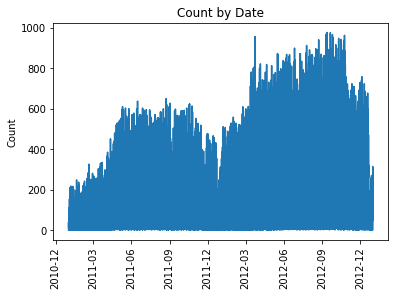

In [27]:
plt.plot(bike.loc[:,"Date"], bike.loc[:,"cnt"])

plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Count by Date")
plt.show()

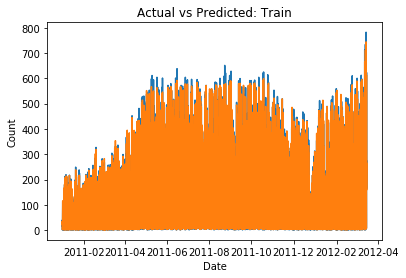

In [9]:
# Train Data
plt.plot(bike.loc[bike_train.index,"Date"], bike_train_Y)
plt.plot(bike.loc[bike_train.index,"Date"], y_train_pred)
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Actual vs Predicted: Train")
plt.show()

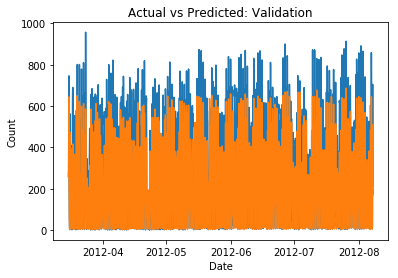

In [10]:
# Validation Data
plt.plot(bike.loc[bike_val.index,"Date"], bike_val_Y)
plt.plot(bike.loc[bike_val.index,"Date"], y_val_pred)
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Actual vs Predicted: Validation")
plt.show()

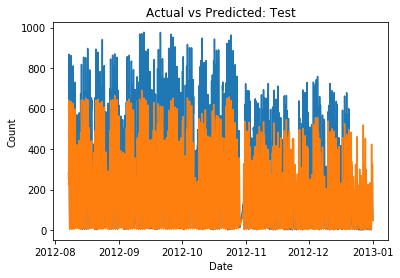

In [11]:
# Test Data
plt.plot(bike.loc[bike_test.index,"Date"], bike_test_Y)
plt.plot(bike.loc[bike_test.index,"Date"], y_test_pred)
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Actual vs Predicted: Test")
plt.show()

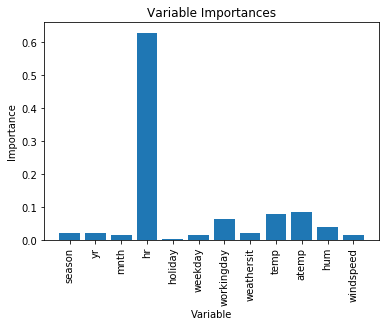

In [61]:
# Variable importance

importances = list(rf.feature_importances_)
feature_list = list(bike_train.columns.values)

feature_importances = [(feature, float(round(importance, 3))) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); 
plt.title('Variable Importances');
plt.show()